In [1]:
import os
import torchaudio
import torch
import torchvision
import matplotlib as plt

In [2]:
def load_audio(path):
    waveform, sample_rate = torchaudio.load(path)
    print(f"Loaded: {path}")
    print(f"Waveform shape: {waveform.shape}, Sample rate: {sample_rate}")
    return waveform, sample_rate

check, two = load_audio("/home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/100")

Loaded: /home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/100
Waveform shape: torch.Size([2, 12068352]), Sample rate: 48000


In [3]:
some, one = load_audio("/home/j597s263/scratch/j597s263/Datasets/Audio/Lossy/100")

Loaded: /home/j597s263/scratch/j597s263/Datasets/Audio/Lossy/100
Waveform shape: torch.Size([2, 11087799]), Sample rate: 44100


In [4]:
def split_into_segments(waveform, segment_size):
    """
    Splits the waveform into fixed-size segments.
    Args:
        waveform: Tensor of shape [2, total_samples].
        segment_size: Number of samples per segment (e.g., 96).
    Returns:
        List of waveform segments.
    """
    total_samples = waveform.shape[1]
    # Ensure padding if the waveform length is not a multiple of segment_size
    pad_length = (segment_size - total_samples % segment_size) % segment_size
    if pad_length > 0:
        waveform = torch.nn.functional.pad(waveform, (0, pad_length))

    # Split the waveform
    segments = [
        waveform[:, i:i + segment_size]
        for i in range(0, waveform.shape[1], segment_size)
    ]
    return segments

# Define segment size
segment_size = 96

# Split the audio
segments = split_into_segments(check, segment_size)

print(f"Total segments: {len(segments)}")
print(f"Shape of each segment: {segments[0].shape}")


Total segments: 125712
Shape of each segment: torch.Size([2, 96])


In [5]:
def split_into_segments(waveform, segment_length=48000):
    """
    Splits a waveform into 1-second segments.
    """
    num_samples = waveform.shape[0]
    segments = []
    for i in range(0, num_samples, segment_length):
        segment = waveform[i:i + segment_length]
        if segment.shape[0] == segment_length:  # Ensure complete segment
            segments.append(segment)
    return torch.stack(segments)  # Stack into a tensor of shape [num_segments, segment_length]

In [6]:
def preprocess_and_split(file_path, segment_duration=1):
    """
    Preprocess and split audio into 1-second segments based on the audio's sample rate.
    """
    # Load audio
    waveform, sample_rate = load_audio(file_path)
    
    # Flatten stereo channels
    waveform = waveform.flatten()
    
    # Calculate the number of samples per segment (1 second)
    segment_length = sample_rate * segment_duration  # Samples in 1 second
    
    # Split into 1-second segments
    segments = split_into_segments(waveform, segment_length)
    
    print(f"Processed {len(segments)} segments from {file_path}, each with duration {segment_duration}s.")
    return segments, sample_rate
def split_into_segments(waveform, segment_length):
    """
    Splits a waveform into fixed-duration segments.
    """
    num_samples = waveform.shape[0]
    segments = []
    for i in range(0, num_samples, segment_length):
        segment = waveform[i:i + segment_length]
        if segment.shape[0] == segment_length:  # Ensure complete segment
            segments.append(segment)
    return torch.stack(segments)  # Stack into a tensor of shape [num_segments, segment_length]

In [8]:
# Process lossless and lossy files
lossless_segments, lossless_sr = preprocess_and_split("/home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/5")
lossy_segments, lossy_sr = preprocess_and_split("/home/j597s263/scratch/j597s263/Datasets/Audio/Lossy/5")

# Check if the number of segments is the same
assert len(lossless_segments) == len(lossy_segments), "Mismatch in segment counts!"
print(f"Segments aligned: {len(lossless_segments)} segments each.")

Loaded: /home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/5
Waveform shape: torch.Size([2, 7905600]), Sample rate: 48000
Processed 329 segments from /home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/5, each with duration 1s.
Loaded: /home/j597s263/scratch/j597s263/Datasets/Audio/Lossy/5
Waveform shape: torch.Size([2, 5270400]), Sample rate: 32000
Processed 329 segments from /home/j597s263/scratch/j597s263/Datasets/Audio/Lossy/5, each with duration 1s.
Segments aligned: 329 segments each.


In [9]:
dataset = list(zip(lossy_segments, lossless_segments))


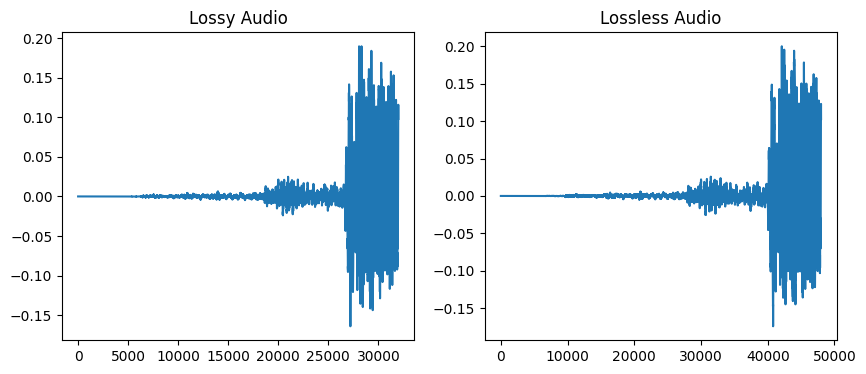

In [11]:
import matplotlib.pyplot as plt

def plot_waveforms(lossy, lossless, idx, save_path=None):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Lossy Audio")
    plt.plot(lossy[idx].numpy())
    plt.subplot(1, 2, 2)
    plt.title("Lossless Audio")
    plt.plot(lossless[idx].numpy())
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save the plot
    plt.show()

# Example usage
plot_waveforms(lossy_segments, lossless_segments, idx=0, save_path="/home/j597s263/scratch/j597s263/StatisticalDecisionTheory/fig1.png")


In [5]:
import torchaudio
import torch
import torchaudio.transforms as T
import os

# Load a test audio file
test_file = "/home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/1.flac"
waveform, sample_rate = torchaudio.load(test_file)

# Print the initial shape and sample rate
print(f"Loaded waveform shape: {waveform.shape}, Sample rate: {sample_rate}")

RuntimeError: Couldn't find appropriate backend to handle uri /home/j597s263/scratch/j597s263/Datasets/Audio/Lossless/1.flac and format None.